In [1]:
import pandas as pd
import numpy as np

from kmeans import KMeans

# Disclaimer

### This is just an example notebook for the self implemented kmeans algorithm. It shows most of the implemented functionality for the kmeans algorithm. 

In [2]:
def read_present_data(synthetic_data = False):

    df_customers = pd.read_csv('../datasets/Mall_Customers.csv') 
    df_customers.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
    
    # Additional synthetic columns
    df_customers['Number of Purchases'] = np.random.randint(1, 20, size=len(df_customers))
    df_customers['Average Purchase Amount'] = np.round(np.random.uniform(10, 1000, size=len(df_customers)), 2)
    
    if synthetic_data:
        synthetic_data_size = 800
        # Additional synthetic rows
        new_rows = {
            'Age': np.random.randint(df_customers['Age'].min(), df_customers['Age'].max(), size=synthetic_data_size),
            'Annual Income (k$)': np.random.randint(df_customers['Annual Income (k$)'].min(), df_customers['Annual Income (k$)'].max(), size=synthetic_data_size),
            'Spending Score (1-100)': np.random.randint(df_customers['Spending Score (1-100)'].min(), df_customers['Spending Score (1-100)'].max(), size=synthetic_data_size),
            'Number of Purchases': np.random.randint(df_customers['Number of Purchases'].min(), df_customers['Number of Purchases'].max(), size=synthetic_data_size),
            'Average Purchase Amount': np.random.uniform(df_customers['Average Purchase Amount'].min(), df_customers['Average Purchase Amount'].max(), size=synthetic_data_size),
        }
        # Concatenate the new data to the existing DataFrame
        df_customers = pd.concat([df_customers, pd.DataFrame(new_rows)], ignore_index=True)

    return df_customers

In [3]:
df_customers = read_present_data()
df_customers

,Age,Annual Income (k$),Spending Score (1-100),Number of Purchases,Average Purchase Amount
0,19,15,39,11,864.65
1,21,15,81,18,190.93
2,20,16,6,14,558.75
3,23,16,77,11,315.25
4,31,17,40,5,367.95
...,...,...,...,...,...
195,35,120,79,8,491.16
196,45,126,28,17,972.69
197,32,126,74,11,65.77
198,32,137,18,11,23.49


## Cluster Method random initialization

In [4]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'random', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=False, plot_data=False)

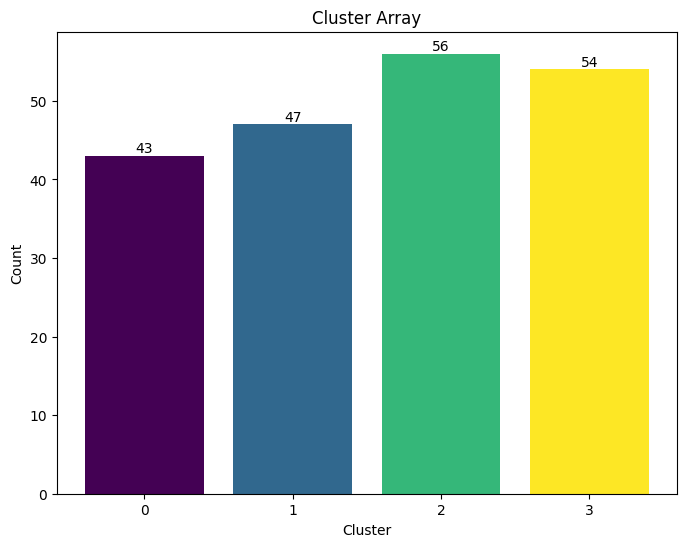

Cluster Array
 [1 0 3 2 2 3 0 3 3 0 2 0 3 3 2 1 3 1 2 2 2 1 0 2 0 2 1 1 1 0 2 0 0 2 2 1 2
 3 0 3 3 1 0 0 3 0 3 3 3 0 1 1 1 3 2 0 2 1 2 0 1 2 3 3 0 1 0 1 1 1 2 2 2 1
 3 3 0 2 3 1 2 3 2 3 1 0 1 1 2 0 2 2 0 2 0 0 3 1 3 2 3 2 2 0 1 0 1 1 2 0 3
 1 1 1 1 3 3 2 3 1 0 2 1 3 3 1 0 3 2 3 2 1 2 2 0 1 2 2 1 1 2 2 3 2 3 0 3 1
 2 1 3 1 3 3 2 2 3 2 1 3 1 0 2 3 3 2 2 0 1 1 0 0 0 3 3 2 0 2 0 3 3 3 3 1 0
 3 3 3 3 0 0 3 2 2 2 2 1 0 0 2] 

Cluster Centroids
 [[-0.41875592 -0.32216956 -0.37865398 -0.53916223 -0.16914299]
 [-0.42469861 -0.33366574 -0.34111389 -0.54616772  3.26798889]
 [-0.40646905 -0.31779575 -0.37451888 -0.53349799  1.10585835]
 [-0.41123099 -0.31183046 -0.36737311 -0.53480138  2.21465498]]


In [5]:
print("Cluster Array\n", kmeans.get_cluster_array(visualize=True), "\n")
print("Cluster Centroids\n", kmeans.get_centroids())

## Cluster Method kmeans++

In [6]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=False, plot_data=False)

In [7]:
print("Cluster Array\n", kmeans.get_cluster_array(), "\n")
print("Cluster Centroids\n", kmeans.get_centroids())

Cluster Array
 [1 0 3 2 2 3 0 3 3 0 2 0 3 3 2 1 3 1 2 2 2 1 0 2 0 2 1 1 1 0 2 0 0 2 2 1 2
 3 0 3 3 1 0 0 3 0 3 3 3 0 1 1 1 3 2 0 2 1 2 0 1 2 3 3 0 1 0 1 1 1 2 2 2 1
 3 3 0 2 3 1 2 3 2 3 1 0 1 1 2 0 2 2 0 2 0 0 3 1 3 2 3 2 2 0 1 0 1 1 2 0 3
 1 1 1 1 3 3 2 3 1 0 2 1 3 3 1 0 3 2 3 2 1 2 2 0 1 2 2 1 1 2 2 3 2 3 0 3 1
 2 1 3 1 3 3 2 2 3 2 1 3 1 0 2 3 3 2 2 0 1 1 0 0 0 3 3 2 0 2 0 3 3 3 3 1 0
 3 3 3 3 0 0 3 2 2 2 2 1 0 0 2] 

Cluster Centroids
 [[-0.41875592 -0.32216956 -0.37865398 -0.53916223 -0.16914299]
 [-0.42469861 -0.33366574 -0.34111389 -0.54616772  3.26798889]
 [-0.40646905 -0.31779575 -0.37451888 -0.53349799  1.10585835]
 [-0.41123099 -0.31183046 -0.36737311 -0.53480138  2.21465498]]


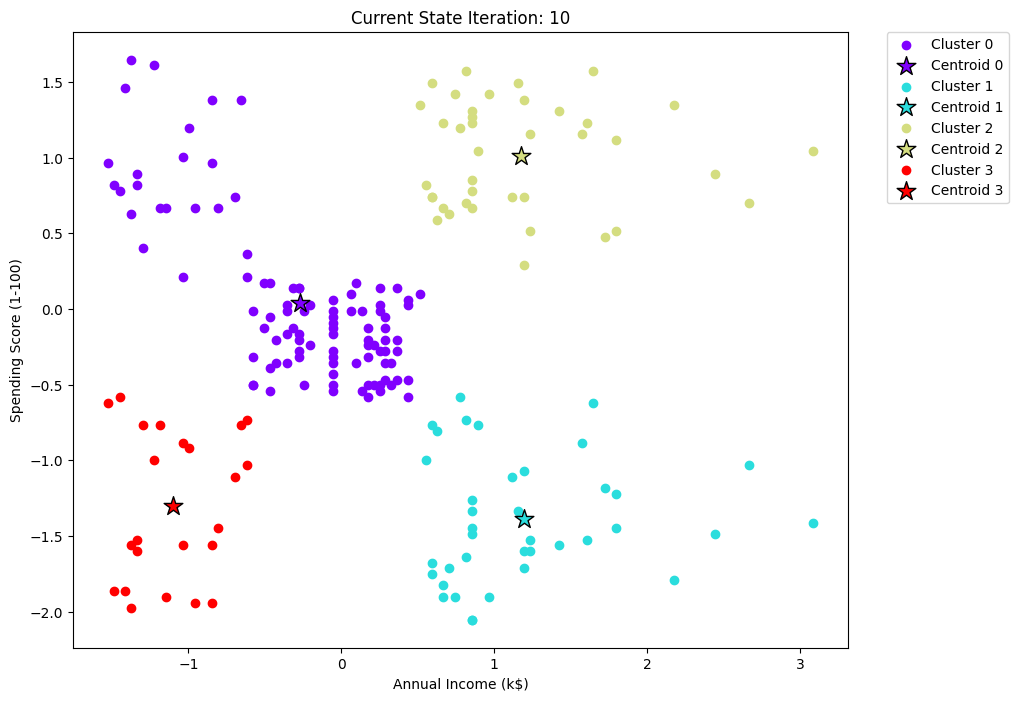

In [8]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers[['Annual Income (k$)', 'Spending Score (1-100)']], scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=True, plot_data=True, gif_path='./kmeans')

In [9]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers[['Annual Income (k$)', 'Spending Score (1-100)', 'Average Purchase Amount']], scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=True, plot_data=True)